In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path: sys.path.append(nb_dir)
from src import wdata
import seaborn as sns;
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

'''
Sat Start: July 2(182) - September 31()
184-195 --> since there is no 182 --> (July 4th - July 15th)
 
#Radar Start: radar.20170702.00.dat


Files I am going to use:
July 4th 17-18th hour (15 minute on of every hour for satellite)
'''


'\nSat Start: July 2(182) - September 31()\n184-195 --> since there is no 182 --> (July 4th - July 15th)\n \n#Radar Start: radar.20170702.00.dat\n\n\nFiles I am going to use:\nJuly 4th 17-18th hour (15 minute on of every hour for satellite)\n'

In [3]:
imgs2017 = wdata.Radar.getYear(2017)


(126, 201)
42
('2017-07-07.23', array([[0.06666667, 0.46666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.46666667, 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]))


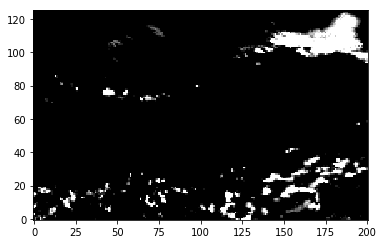

In [7]:
print(imgs2017[-1][-1].shape)
image = imgs2017[-1][-1]
plt.imshow(image, cmap='gray', origin='lower')
print(len(imgs2017)) 
print(imgs2017[-1])

In [13]:
def resizeflat_radar(radar_list, shape): #radar will be the list of radar images, and shape will be the shape you want to resize it to
    '''
    Input: List radar images in numpy arrays, and shape to resize it to (equal to satellite shape)
    Output: List of equal length with resized and flattened numpy arrays of length 10400 (52 x 200)'''
    resized_list = []
    for index in range(len(radar_list)):
        resized_radar = resize(radar_list[index][1], shape)
        resized_list.append((resized_radar.flatten()).tolist())
    return resized_list

new_radar = resizeflat_radar(imgs2017, (52, 200))
print(len(new_radar[0]))


10400


/home/yuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
test = wdata.Sat.getYear(2017, 4)
print(len(test))


42


In [7]:
#print(test[0])
#print(test[0]['data'][0])
#print(test[0]['data'][0])
print(type(test))
print(len(test))

<class 'list'>
17


last [[13856. 17184. 14912. ... 13632. 12640.  8576.]
 [14080. 12608. 14624. ... 11008. 10016.  9088.]
 [ 9664. 17344. 19264. ... 10784. 10304.  7872.]
 ...
 [18656. 17952. 14592. ... 17984. 17952. 18080.]
 [18464. 16608. 14720. ... 17952. 18144. 18176.]
 [15072. 14272. 12992. ... 17984. 18080. 18144.]]


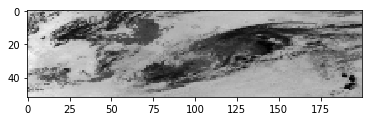

In [39]:
print("last",test[-1]['data'][0])
plt.imshow(test[0]['data'][0], cmap='gray')

In [14]:
def flatten_sat(sat_list):
    flattened_list = []
    for index in range(len(sat_list)):
        flattened = sat_list[index]['data'][0].flatten()
        flattened_list.append(flattened.tolist())
    return flattened_list




In [33]:
Satband4 = wdata.Sat.getYear(2017, 6)
#Satband6 = wdata.Sat.getYear(2017, 6)

In [11]:
Radar = wdata.Radar.getYear(2017)

In [36]:
#print(Satband4[-1]['data'][0])
#print(len(Satband4[:-1]))
'''
train_x = (np.array(flatten_sat(Satband4[:-1]))).reshape(-1,1)
test_x = (np.array(flatten_sat(Satband4[-1:]))).reshape(-1,1)
train_y = (np.array(resizeflat_radar(Radar[:-1], (52, 200)))).reshape(-1,1)
test_y = (np.array(resizeflat_radar(Radar[-1:], (52, 200)))).reshape(-1,1)
'''

[6]


In [34]:
flatSat4 = (np.array(flatten_sat(Satband4))).reshape(-1,1)
#flatSat6 = flatten_sat(Satband6)
print(len(flatSat4))

436800


In [35]:
flatRad =  (np.array(resizeflat_radar(Radar, (52, 200)))).reshape(-1,1)
print(len(flatRad))

436800


/home/yuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [36]:
print("length of Sat 4: ", len(flatSat4[0])) # all are lists of length 10400
#print("length of Sat 6: ", len(flatSat6[0]))
print("length of radar: ", len(flatRad[0]))

length of Sat 4:  1
length of radar:  1


In [37]:
print(len(flatSat4[6]))
print(len(flatRad[6]))

1
1


Coefficients: 
 [[-1.06485694e-06]]
Mean squared error: 0.05
Variance score: -0.01


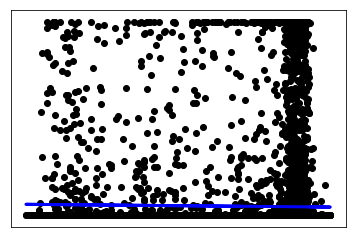

In [38]:
'''
Linear Regression
'''
train_x = (np.array(flatSat4[:-10400])).reshape(-1,1)
train_y = (np.array(flatRad[:-10400])).reshape(-1,1)
test_x = (np.array(flatSat4[-10400:])).reshape(-1,1)
test_y = (np.array(flatRad[-10400:])).reshape(-1,1)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))

# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



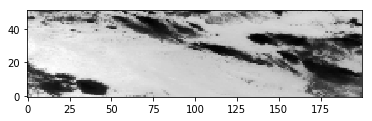

In [32]:
plt.imshow(test_x.reshape(52, 200), cmap='gray', origin='lower')

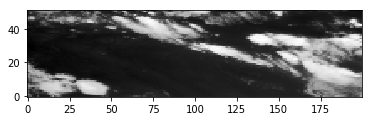

In [46]:
inverted_test = 1 -test_x
plt.imshow(inverted_test.reshape(52, 200), cmap='gray', origin='lower')

[[0.04420945]
 [0.0446865 ]
 [0.04492503]
 ...
 [0.04097228]
 [0.04090413]
 [0.04090413]]


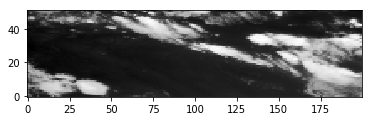

In [47]:

plt.imshow(y_pred.reshape(52, 200), cmap= 'gray', origin='lower')
print(y_pred)

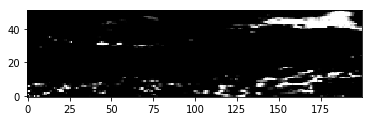

In [31]:
plt.imshow(test_y.reshape(52, 200), cmap='gray', origin='lower')

In [52]:
def data_read_display(data):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt

    dims = (52,200)   # rows, columns
    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall
    #data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    #print('size of read vector',len(data))
    data = np.reshape(data,dims)
    #print(data[98]) #max exists in the 98th element row
    
    #print('elemnt of max', np.argmax(data))
    #print('np.max(data)', np.max(data))
    #print('np.min(data)', np.min(data))
    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data = (data - minmax[0])/(minmax[1] - minmax[0])
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.imshow(data, cmap='gray', origin='lower')

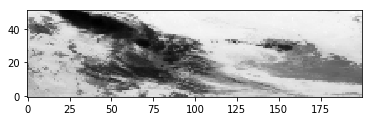

In [53]:
data_read_display(y_pred)

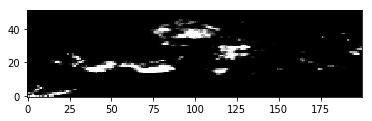

In [54]:
data_read_display(test_yfilename)

In [48]:
a = np.array([[1],[2],[3]]).reshape(-1,1)
b = np.array([[2],[3],[4]]).reshape(-1,1)

In [52]:
np.concatenate((a, b), axis=1)

array([[1, 2],
       [2, 3],
       [3, 4]])

[[2]
 [3]
 [4]]
